In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [275]:
data=pd.read_csv('https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821/download/traffic_density_202001.csv')

In [276]:
data3=data
data3

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
...,...,...,...,...,...,...,...,...
1328619,2020-01-04 11:00:00,28.383179,41.168518,sxk4jy,6,49,22,14
1328620,2020-01-08 15:00:00,28.218384,41.119080,sxk1fj,55,132,83,71
1328621,2020-01-04 12:00:00,28.086548,41.190491,sx7fr4,55,129,81,90
1328622,2020-01-22 14:00:00,28.987427,41.108093,sxk9ge,8,87,43,100


Tek bir lokasyonu aldım.

In [277]:
data3=data3[data3['GEOHASH']=='sxkbhn']
data3

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
2246,2020-01-19 22:00:00,29.360962,40.816956,sxkbhn,10,130,72,180
3190,2020-01-13 15:00:00,29.360962,40.816956,sxkbhn,27,116,71,238
5923,2020-01-21 01:00:00,29.360962,40.816956,sxkbhn,26,142,70,100
6415,2020-01-15 02:00:00,29.360962,40.816956,sxkbhn,19,131,77,77
...,...,...,...,...,...,...,...,...
1318864,2020-01-15 00:00:00,29.360962,40.816956,sxkbhn,29,126,71,196
1320390,2020-01-23 11:00:00,29.360962,40.816956,sxkbhn,14,110,62,233
1322555,2020-01-05 17:00:00,29.360962,40.816956,sxkbhn,10,144,75,173
1324763,2020-01-20 22:00:00,29.360962,40.816956,sxkbhn,25,135,70,225


In [278]:
data3=data3[['DATE_TIME','NUMBER_OF_VEHICLES']]
data3

,DATE_TIME,NUMBER_OF_VEHICLES
3,2020-01-14 22:00:00,216
2246,2020-01-19 22:00:00,180
3190,2020-01-13 15:00:00,238
5923,2020-01-21 01:00:00,100
6415,2020-01-15 02:00:00,77
...,...,...
1318864,2020-01-15 00:00:00,196
1320390,2020-01-23 11:00:00,233
1322555,2020-01-05 17:00:00,173
1324763,2020-01-20 22:00:00,225


In [279]:
data3.dtypes

DATE_TIME             object
NUMBER_OF_VEHICLES     int64
dtype: object

String olan sütunu zaman serisi olarak çevirdikten sonra indeks olarak atadım.

In [280]:
data3['DATE_TIME'] = pd.to_datetime(data3['DATE_TIME'])
data3.index=data3['DATE_TIME']
data3=data3.sort_index(axis=0)
data3

C:\Users\engin\AppData\Local\Temp\ipykernel_7992\1793621116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['DATE_TIME'] = pd.to_datetime(data3['DATE_TIME'])


,DATE_TIME,NUMBER_OF_VEHICLES
DATE_TIME,,
2020-01-01 00:00:00,2020-01-01 00:00:00,96
2020-01-01 01:00:00,2020-01-01 01:00:00,60
2020-01-01 02:00:00,2020-01-01 02:00:00,58
2020-01-01 03:00:00,2020-01-01 03:00:00,52
2020-01-01 04:00:00,2020-01-01 04:00:00,36
...,...,...
2020-01-31 19:00:00,2020-01-31 19:00:00,331
2020-01-31 20:00:00,2020-01-31 20:00:00,328
2020-01-31 21:00:00,2020-01-31 21:00:00,244


In [281]:
data3=data3.drop(['DATE_TIME'],axis=1)
data3

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 00:00:00,96
2020-01-01 01:00:00,60
2020-01-01 02:00:00,58
2020-01-01 03:00:00,52
2020-01-01 04:00:00,36
...,...
2020-01-31 19:00:00,331
2020-01-31 20:00:00,328
2020-01-31 21:00:00,244


Veride belirtilen zamanlarda eksik değer bulunmamakta.

In [282]:
check_nan = data3['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

False

Ama veride eksik saatler bulunmakta.

In [283]:
my_range = pd.date_range(start="2020-01-01 00:00:00", end="2020-01-31 23:00:00", freq='H')
my_range.difference(data3.index)

DatetimeIndex(['2020-01-26 09:00:00', '2020-01-26 12:00:00',
               '2020-01-31 07:00:00', '2020-01-31 08:00:00'],
              dtype='datetime64[ns]', freq=None)

Eksik saatleri asfreq fonksiyonu ile tamamladım.

In [284]:
data3=data3.asfreq('H')

Oluşturulan satırların 'NUMBER_OF_VEHICLES' sütunu null değerler içermekte.

In [285]:
check_nan = data3['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

True

In [286]:
lis=data3[data3['NUMBER_OF_VEHICLES'].isnull()].index.tolist()
lis

[Timestamp('2020-01-26 09:00:00'),
 Timestamp('2020-01-26 12:00:00'),
 Timestamp('2020-01-31 07:00:00'),
 Timestamp('2020-01-31 08:00:00')]

Null değerlerin olduğu satırların bir sonraki ve bir önceki indekslerindeki değerlerin ortalamalarını eksik değerlere atadım. Eğer önceki veya sonraki değer de null ise +-1 sonraki indeks ile işleme devam ettim.

In [287]:
for i in lis:
    index=data3.index.get_loc(i)
    if np.isnan(data3.iloc[index+1]['NUMBER_OF_VEHICLES']) or np.isnan(data3.iloc[index-1]['NUMBER_OF_VEHICLES']):
        
        y=index+1
        z=index-1
        if np.isnan(data3.iloc[y]['NUMBER_OF_VEHICLES']):
            y=index+1
            while np.isnan(data3.iloc[y]['NUMBER_OF_VEHICLES']):
                y=y+1
        if np.isnan(data3.iloc[z]['NUMBER_OF_VEHICLES']):
            z=index-1
            while np.isnan(data3.iloc[z]['NUMBER_OF_VEHICLES']):
                z=z-1
        ort=(data3.iloc[y]['NUMBER_OF_VEHICLES'] + data3.iloc[z]['NUMBER_OF_VEHICLES'])/2 
        data3.iloc[index]['NUMBER_OF_VEHICLES']=ort
        
    else:
        ort=(data3.iloc[index+1]['NUMBER_OF_VEHICLES']+data3.iloc[index-1]['NUMBER_OF_VEHICLES'])/2
        data3.iloc[index]['NUMBER_OF_VEHICLES']=ort
        
            

In [288]:
check_nan = data3.isnull().values.any()
check_nan

False

In [289]:
my_range = pd.date_range(start="2020-01-01 00:00:00", end="2020-01-31 23:00:00", freq='H')
my_range.difference(data3.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='H')

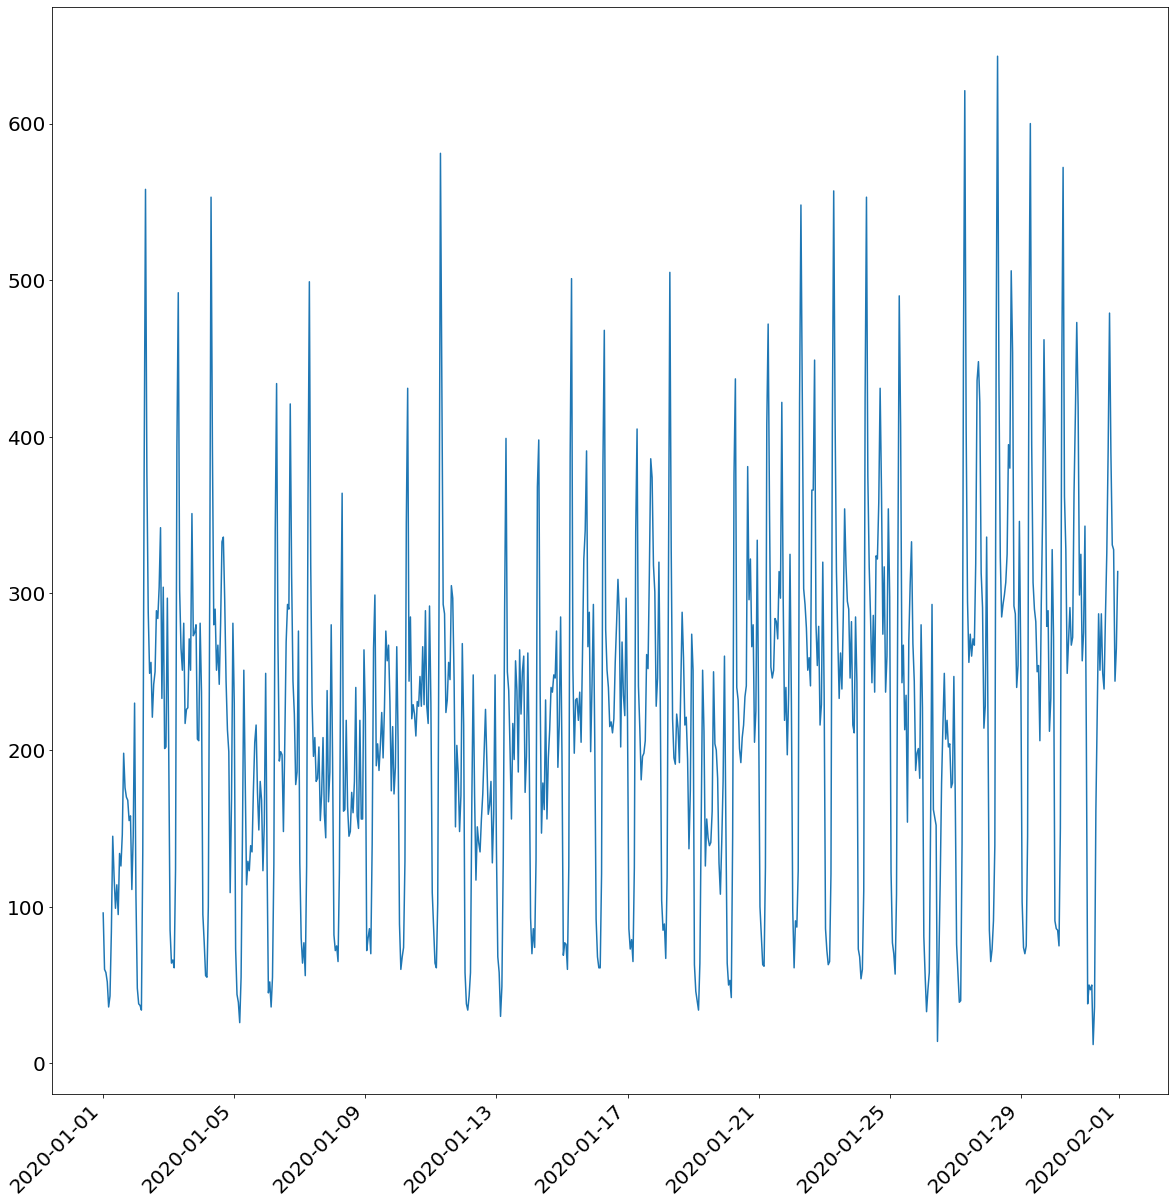

In [290]:
plt.figure(figsize=(20, 20))
plt.rcParams["font.size"] =20
plt.xticks(rotation=45, ha='right')
plt.plot(data3)

Modeli kurmadan önce verinin durağan olması gerekli. Grafikte mevsimsellik rahat bir şekilde görülebilse de daha iyi bir görüş için hareketli ortalamalar metodunu kullanarak gürültülerden kurtuldum. 

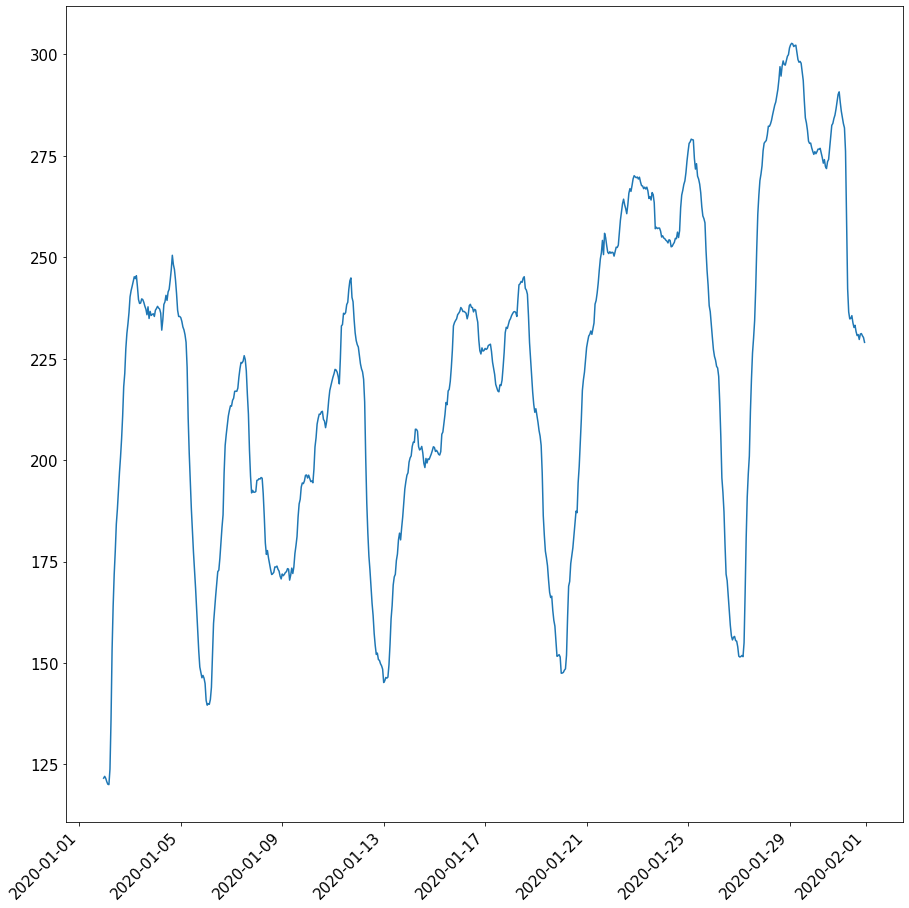

In [291]:
rol=data3.rolling(window=24).mean()
plt.figure(figsize=(15, 15))
plt.rcParams["font.size"] =15
plt.xticks(rotation=45, ha='right')
plt.plot(rol)

Yukarı doğru bir trend ve mevsimsellik rahat bir şekilde görülebilmekte. Modeli kurmadan önce bunlardan kurtulmalıyız.

In [292]:
datasf=data3-data3.shift(1)

<AxesSubplot:xlabel='DATE_TIME'>

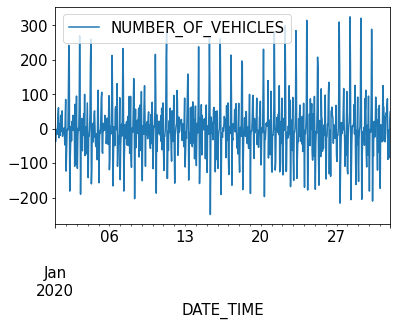

In [294]:
datasf.plot()

In [295]:
sfrol=datasf.rolling(window=24).mean()

<AxesSubplot:xlabel='DATE_TIME'>

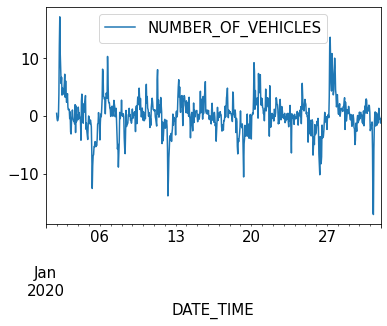

In [296]:
sfrol.plot()

In [297]:
check_nan = sfrol['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

True

In [298]:
sfrol=sfrol[24:]
sfrol.head(30)

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-02 00:00:00,0.458333
2020-01-02 01:00:00,-0.500000
2020-01-02 02:00:00,-0.833333
2020-01-02 03:00:00,-0.625000
2020-01-02 04:00:00,-0.083333
2020-01-02 05:00:00,3.833333
2020-01-02 06:00:00,12.208333
2020-01-02 07:00:00,17.208333
2020-01-02 08:00:00,10.750000


In [299]:
X = sfrol['NUMBER_OF_VEHICLES'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.850822
p-value: 0.000000


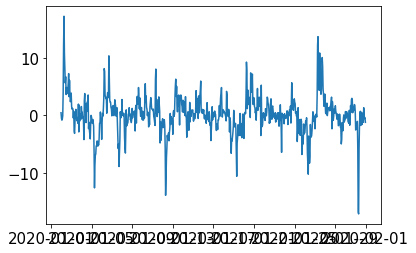

In [300]:
plt.plot(sfrol)

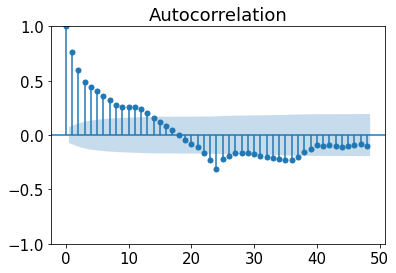

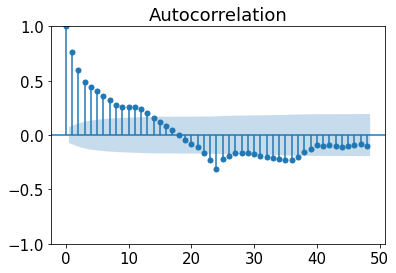

In [301]:
plot_acf(sfrol['NUMBER_OF_VEHICLES'], lags= 48)

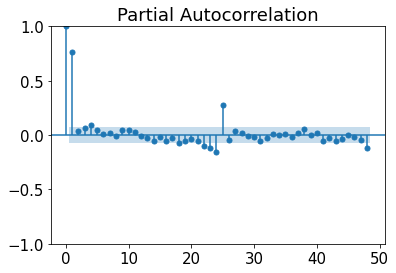

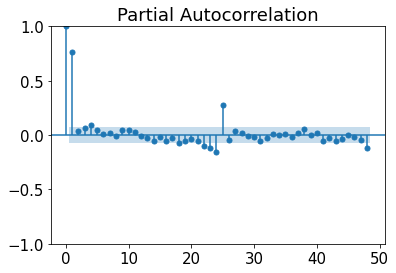

In [302]:
plot_pacf(sfrol['NUMBER_OF_VEHICLES'],method='ywm', lags= 48)

In [303]:
train=data3[:700]
test=data3[700:]


In [304]:
len(train),len(test)

(700, 44)

In [305]:
from pmdarima import auto_arima

In [306]:
import itertools

In [307]:
p=range(0,5)
q=range(0,5)
d=range(0,2)

In [308]:
comb=list(itertools.product(p,d,q))

In [309]:
len(comb)

50

In [310]:
pdq=[]
error=[]
from sklearn.metrics import mean_squared_error

In [311]:
for i in comb:
    model=ARIMA(train,order=i).fit()
    pred=model.predict(start=len(train),end=(len(data3)-1))
    MSE = mean_squared_error(test,pred)
    pdq.append(i)
    error.append(MSE)

C:\Users\engin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\engin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\engin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\engin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\engin\anaconda3\lib\site-packages\stat

In [312]:
d={'order':pdq,'MSE':error}
df=pd.DataFrame(d)
df.sort_values(by=['MSE'],ascending=True)

,order,MSE
29,"(2, 1, 4)",14756.912985
46,"(4, 1, 1)",14984.565339
47,"(4, 1, 2)",15061.005816
49,"(4, 1, 4)",15243.144112
26,"(2, 1, 1)",15414.566180
38,"(3, 1, 3)",15538.805354
8,"(0, 1, 3)",15859.970853
37,"(3, 1, 2)",16023.716220
9,"(0, 1, 4)",16091.861040
27,"(2, 1, 2)",16269.610928


In [313]:
model=ARIMA(train,order=(2,1,4)).fit()
pred=model.predict(start=len(train),end=(len(data3)-1))

C:\Users\engin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DATE_TIME'>

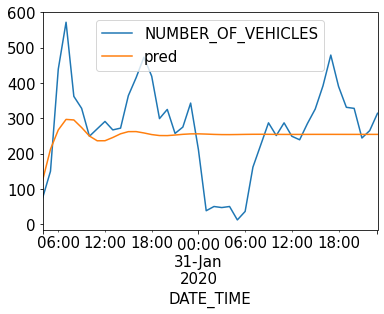

In [314]:
test.plot(legend=True,label='test')
pred.plot(legend=True,label='pred')

In [315]:
auto_arima(train['NUMBER_OF_VEHICLES'],m=24,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=11.87 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=8174.917, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=7810.618, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=8172.917, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=8119.310, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(0,1,1)(0,0,2)[24] intercept   : AIC=7683.628, Time=5.05 sec
 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=inf, Time=11.71 sec
 ARIMA(0,1,0)(0,0,2)[24] intercept   : AIC=7682.318, Time=3.21 sec
 ARIMA(0,1,0)(0,0,1)[24] intercept   : AIC=7815.437, Time=0.96 sec
 ARIMA(0,1,0)(1,0,2)[24] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(1,1,0)(0,0,2)[24] intercept   : AIC=7683.925, Time=4.33 sec
 ARIMA(1,1,1)(0,0,2)[24] intercept   : AIC=7677

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  700
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2], 24)   Log Likelihood               -3787.851
Date:                                 Thu, 14 Jul 2022   AIC                           7587.703
Time:                                         14:10:06   BIC                           7615.001
Sample:                                              0   HQIC                          7598.256
                                                 - 700                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1585      0.029     -5.429      0.000      -0.216      -0.101
ma.L2         -0.3482      0.039     -8.876      0.000      -0.425      -0.271
ma.L3         -0.2442      0.039     -6.186      0.000      -0.322      -0.167
ma.S.L24       0.6438      0.028     22.665      0.000       0.588       0.700
ma.S.L48       0.3843      0.032     12.173      0.000       0.322       0.446
sigma2      2920.9525    112.608     25.939      0.000    2700.244    3141.661
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               301.48
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.98
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [319]:
mod=SARIMAX(train['NUMBER_OF_VEHICLES'],order=(0,1,3),seasonal_order=(2,0,0,24))
res=mod.fit()
pred1=res.predict(start=len(train),end=(len(data3)-1))

In [320]:
pred1

2020-01-30 04:00:00     97.290104
2020-01-30 05:00:00    148.417989
2020-01-30 06:00:00    430.069156
2020-01-30 07:00:00    562.587875
2020-01-30 08:00:00    383.314736
2020-01-30 09:00:00    297.515909
2020-01-30 10:00:00    275.416073
2020-01-30 11:00:00    273.966465
2020-01-30 12:00:00    259.177033
2020-01-30 13:00:00    264.051528
2020-01-30 14:00:00    244.979648
2020-01-30 15:00:00    315.035933
2020-01-30 16:00:00    339.888314
2020-01-30 17:00:00    442.485040
2020-01-30 18:00:00    386.558421
2020-01-30 19:00:00    272.039631
2020-01-30 20:00:00    275.580680
2020-01-30 21:00:00    218.748056
2020-01-30 22:00:00    234.656544
2020-01-30 23:00:00    316.536665
2020-01-31 00:00:00    255.901497
2020-01-31 01:00:00    107.604368
2020-01-31 02:00:00     94.940905
2020-01-31 03:00:00     93.030666
2020-01-31 04:00:00    101.236696
2020-01-31 05:00:00    152.388065
2020-01-31 06:00:00    411.824905
2020-01-31 07:00:00    528.001635
2020-01-31 08:00:00    362.632582
2020-01-31 09:

<AxesSubplot:xlabel='DATE_TIME'>

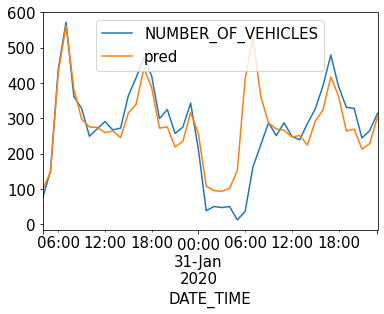

In [321]:
test.plot(legend=True,label='test')
pred1.plot(legend=True,label='pred')

In [323]:
hata = mean_squared_error(test,pred1)
hata

8521.462773594918